# Práctica 1: Reconocimiento de dígitos manuscritos con extracción manual de características

El nuevo banco "First bank of Wiki" desea implementar un sistema de reconocimiento automático de cheques como el siguiente:

![texto alternativo](https://upload.wikimedia.org/wikipedia/commons/b/b9/CanadianChequeSample.png)


Actualmente, el banco cuenta con un sistema capaz de aislar los dígitos y convertirlos en imágenes de 8 x 8, pero no de reconocer de qué dígito se trata. Por esa razón, nos ha solicitado realizar un módulo capaz de reconocer dígitos manuscritos dada una imagen de 8 x 8 pixeles:


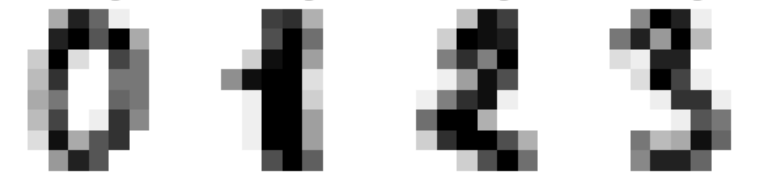



# Cargando los datos

Primero vamos a cargar el dataset y visualizar algunos dígitos.

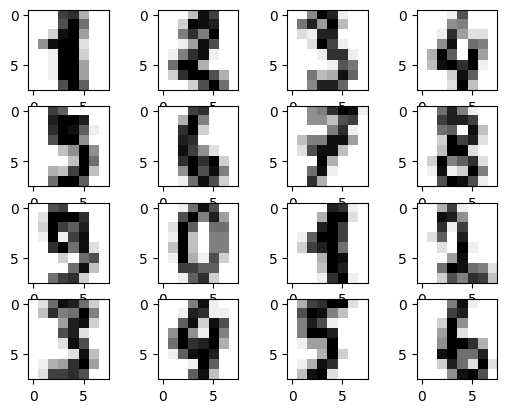

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(digits.images[i,:,:], cmap=plt.get_cmap('gray_r'))


# Binarizando el problema

Para comenzar con un problema más simple, sólo trabajaremos en el escenario de clasificación binaria para dígitos 0 y 1. Para eso, primero filtramos los datos y luego los particionamos en training y test folds.

In [ ]:
# Cargo los dígitos
#X, y = load_digits(return_X_y=True)
X, y = digits.images, digits.target

# Filtro los que sean 0 o 1
indices = np.array(range(X.shape[0]))
bin_indices = indices[(y==0) | (y == 1)]

X_bin = X[bin_indices,:,:]
y_bin = y[bin_indices]

# Creo los splits para training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_bin_train, X_bin_test, y_bin_train, y_bin_test = train_test_split(X_bin, y_bin, test_size=0.33, random_state=42)

print("Total de datos para clasificación entre 10 dígitos: " + str(y.shape[0]))
print("Total de datos para clasificación binaria: " + str(y_bin.shape[0]))
print("Total de 1s para clasificación binaria: " + str(y_bin_test.sum()))
print("Total de 0s para clasificación binaria: " + str(y_bin_test.shape[0] - y_bin_test.sum()))


Total de datos para clasificación entre 10 dígitos: 1797
Total de datos para clasificación binaria: 360
Total de 1s para clasificación binaria: 60
Total de 0s para clasificación binaria: 59


Visualizamos ahora los dígitos del problema binario

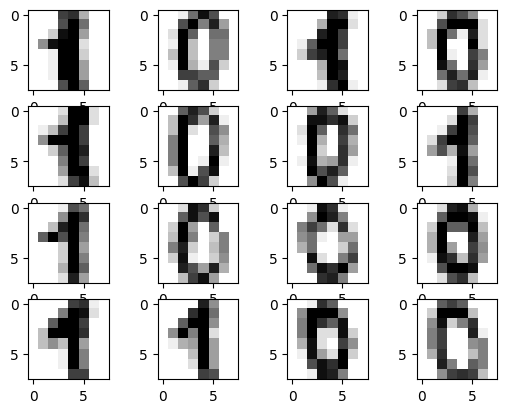

In [ ]:
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X_bin[i,:,:], cmap=plt.get_cmap('gray_r'))

# Entrenando un perceptrón simple con extracción manual de características para clasificación binaria

Ahora procederemos a entrenar un perceptrón usando la biblioteca Scikit Learn. Esta biblioteca de aprendizaje automático implementa muchísimos modelos listos para usar. En este caso, usaremos el perceptrón simple `sklearn.linear_model.Perceptron`

Pero antes de definir el perceptrón, vamos a definir el método de extracción de características que transformará una imagen (`np.array`) de 8 x 8 en un vector unidimensional de 2 componentes. Para ello, podemos probar con dos estrategias diferentes (si se les ocurre alguna otra, adelante!):

* **Estrategia 1:** vamos a considerar la feature 0 como la media de intensidades de la parte superior del dígito (filas 0 a 3) y y la feature 1 como la media de la parte inferior (filas 4 a 7) tal como indica la imagen:

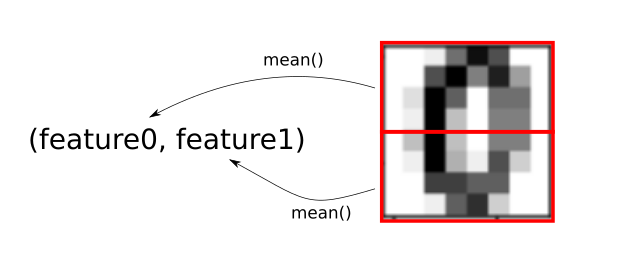

* **Estrategia 2:** Como alternativa, vamos a considerar la feature 0 como la media de toda la imagen, y la feature 1 como el desvío estandar:

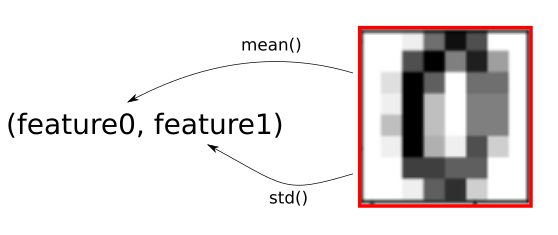


In [ ]:
def extract_features_mean_std(x):
  x_out = np.zeros(shape=(1,2))
  x_out[0,0] =  np.mean(x)
  x_out[0,1] = np.std(x)

  return x_out

def extract_features_mean_top_bottom(x):
  x_out = np.zeros(shape=(1,2))

  # Calculate the mean of the top half (rows 0-3)
  x_out[0,0] = np.mean(x[0:4,:])

  # Calculate the mean of the bottom half (rows 4-7)
  x_out[0,1] = np.mean(x[4:8,:])

  return x_out

def preprocess_features_mean_std(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_std(X[i,:,:])

  return X_pp

def preprocess_features_mean_top_bottom(X):
  X_pp = np.zeros(shape=(X.shape[0], 2))

  for i in range(X.shape[0]):
    X_pp[i,:] = extract_features_mean_top_bottom(X[i,:,:])

  return X_pp


Ahora implementamos el perceptrón usando la clase `sklearn.linear_model.Perceptron` y lo entrenamos usando las features elegidas (probar con ambas features y ver cuál da mejor accuracy).

In [51]:
from sklearn.linear_model import Perceptron

# Definimos un pereceptrón
clasificador =  Perceptron(random_state=42)

# Transformamos las features de los datos para el problema binario
X_bin_train_features = preprocess_features_mean_top_bottom(X_bin_train)
X_bin_test_features = preprocess_features_mean_top_bottom(X_bin_test)

# Entrenamos el clasificador
clasificador.fit(X_bin_train_features, y_bin_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador.score(X_bin_test_features,y_bin_test )))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador.predict(X_bin_test_features)))



Accuracy en test: 0.4957983193277311
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]


In [53]:
from sklearn.linear_model import Perceptron

# Definimos un pereceptrón
clasificador =  Perceptron(random_state=42)

# Transformamos las features de los datos para el problema binario
X_bin_train_features = preprocess_features_mean_std(X_bin_train)
X_bin_test_features = preprocess_features_mean_std(X_bin_test)

# Entrenamos el clasificador
clasificador.fit(X_bin_train_features, y_bin_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador.score(X_bin_test_features,y_bin_test )))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador.predict(X_bin_test_features)))



Accuracy en test: 0.8739495798319328
Predictions: [1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1
 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 0]


# Visualizando las features

Para entender el grado de discriminabilidad que presentan nuestras features, vamos a visualizarlas. Para hacerlo, colorear los items de cada clase con un color diferente.

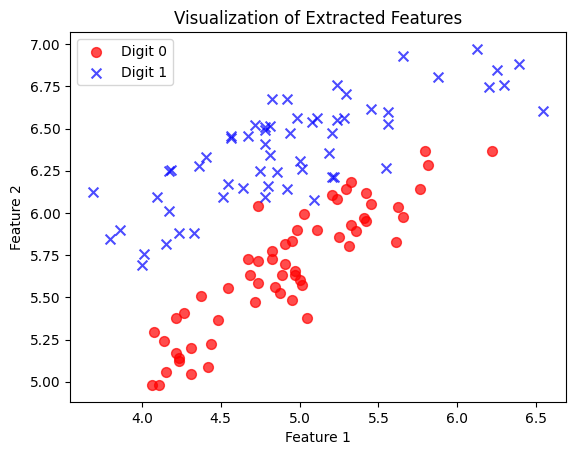

In [54]:
plt.figure()
# Separate features based on class
features_0 = X_bin_test_features[y_bin_test == 0]
features_1 = X_bin_test_features[y_bin_test == 1]

# Plot features with color coding
plt.scatter(features_0[:, 0], features_0[:, 1], s=50, c='red', marker='o', alpha=0.7, label='Digit 0')
plt.scatter(features_1[:, 0], features_1[:, 1], s=50, c='blue', marker='x', alpha=0.7, label='Digit 1')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of Extracted Features")
plt.legend()
plt.show()

# Complicando las cosas:


Ahora volvemos al caso de 10 dígitos y probamos la misma estrategia que estábamos usando anteriormente.

In [56]:
# Definimos un pereceptrón
clasificador10 = Perceptron(random_state=42)

X_train_features =  preprocess_features_mean_top_bottom(X_train)
X_test_features = preprocess_features_mean_top_bottom(X_test)

clasificador10.fit(X_train_features, y_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador10.score( X_test_features,y_test )))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador10.predict( X_test_features )))

Accuracy en test: 0.21885521885521886
Predictions: [2 8 2 9 8 8 8 2 9 8 8 9 8 8 8 8 8 8 8 8 2 8 9 8 9 6 8 8 6 8 6 8 6 6 8 8 9
 8 9 6 6 9 8 8 6 8 8 8 6 8 9 8 8 8 2 8 8 8 8 9 8 8 9 8 8 8 8 8 8 8 8 2 8 8
 9 8 6 8 9 9 8 8 8 8 8 8 6 8 2 9 9 8 8 8 9 8 9 8 2 8 8 8 9 9 8 8 8 9 8 8 9
 8 2 8 8 9 8 9 8 9 8 6 9 2 2 2 8 8 8 8 8 9 9 9 8 6 6 8 8 8 8 9 8 6 8 9 6 9
 2 8 8 8 8 8 6 8 8 9 8 9 8 8 8 8 6 8 8 6 9 9 8 8 6 8 8 8 9 2 8 8 8 9 8 8 8
 8 8 8 6 8 9 8 8 8 9 8 8 8 8 8 9 9 9 9 8 8 8 8 8 8 8 8 8 6 8 8 6 8 8 8 8 8
 8 8 8 9 6 8 8 8 8 6 8 9 9 6 8 8 6 9 8 8 9 8 8 8 8 8 9 9 9 2 8 8 8 2 8 8 9
 8 6 8 8 9 9 2 8 8 2 8 8 9 9 6 8 8 6 8 8 2 6 9 9 2 8 8 9 8 9 9 9 8 8 8 8 9
 8 8 8 2 8 8 8 2 8 8 8 8 8 8 6 8 8 8 9 8 8 2 8 9 8 8 8 8 8 8 6 8 8 8 8 2 8
 8 8 8 9 9 8 2 8 6 8 8 9 8 8 8 9 8 8 8 9 8 9 2 8 8 8 8 6 8 8 8 8 9 8 8 8 8
 8 8 6 9 9 6 2 8 8 8 8 8 2 8 8 8 9 8 9 8 2 8 8 8 2 8 8 8 9 8 8 6 2 2 8 8 8
 8 9 8 9 2 9 9 8 8 9 8 8 8 9 8 8 8 8 8 8 9 8 9 9 8 8 6 8 8 6 8 8 8 2 9 9 9
 8 9 6 8 6 9 8 8 8 8 8 8 9 8 2 8 9 9 8 8 8 8 8 9 

In [40]:
# Definimos un pereceptrón
clasificador10 = Perceptron(random_state=42)

X_train_features =  preprocess_features_mean_std(X_train)
X_test_features = preprocess_features_mean_std(X_test)

clasificador10.fit(X_train_features, y_train)

# Imprimir la accuracy en los datos de test.
print("Accuracy en test: " + str(clasificador10.score( X_test_features,y_test )))

# Imprimir las predicciones realizadas para los datos de test

print("Predictions: " + str(clasificador10.predict( X_test_features )))

Accuracy en test: 0.12289562289562289
Predictions: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

Para intentar entender por qué disminuye tan drásticamente la performance, visualicen las features de las 10 clases coloreando cada punto en un color diferente como hicimos anteriormente.

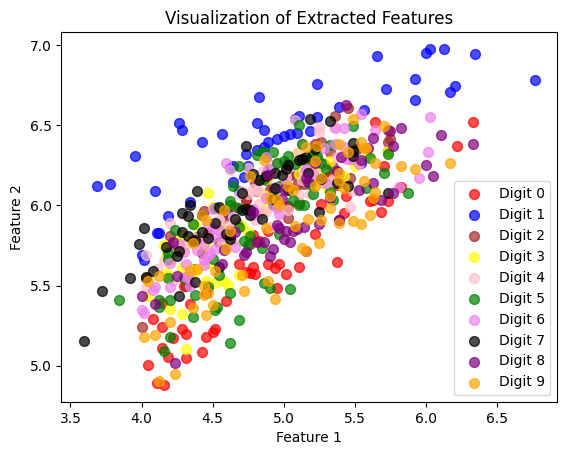

In [50]:
plt.figure()
# Separate features based on class


features_0 = X_test_features[y_test == 0]
features_1 = X_test_features[y_test == 1]
features_2 = X_test_features[y_test == 2]
features_3 = X_test_features[y_test == 3]
features_4 = X_test_features[y_test == 4]
features_5 = X_test_features[y_test == 5]
features_6 = X_test_features[y_test == 6]
features_7 = X_test_features[y_test == 7]
features_8 = X_test_features[y_test == 8]
features_9 = X_test_features[y_test == 9]

# Plot features with color coding
plt.scatter(features_0[:, 0], features_0[:, 1], s=50, c='red', marker='o', alpha=0.7, label='Digit 0')
plt.scatter(features_1[:, 0], features_1[:, 1], s=50, c='blue', marker='o', alpha=0.7, label='Digit 1')
plt.scatter(features_2[:, 0], features_2[:, 1], s=50, c='brown', marker='o', alpha=0.7, label='Digit 2')
plt.scatter(features_3[:, 0], features_3[:, 1], s=50, c='yellow', marker='o', alpha=0.7, label='Digit 3')
plt.scatter(features_4[:, 0], features_4[:, 1], s=50, c='pink', marker='o', alpha=0.7, label='Digit 4')
plt.scatter(features_5[:, 0], features_5[:, 1], s=50, c='green', marker='o', alpha=0.7, label='Digit 5')
plt.scatter(features_6[:, 0], features_6[:, 1], s=50, c='violet', marker='o', alpha=0.7, label='Digit 6')
plt.scatter(features_7[:, 0], features_7[:, 1], s=50, c='black', marker='o', alpha=0.7, label='Digit 7')
plt.scatter(features_8[:, 0], features_8[:, 1], s=50, c='purple', marker='o', alpha=0.7, label='Digit 8')
plt.scatter(features_9[:, 0], features_9[:, 1], s=50, c='orange', marker='o', alpha=0.7, label='Digit 9')


plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Visualization of Extracted Features")
plt.legend()
plt.show()

# Entregable:
* Deberán entregar el Colab completo con el código funcionando. Además, deberán incluir (en el mismo Colab) un pequeño informe donde muestren las visualizaciones de las features, y responder a las siguientes preguntas:

1. ¿Cuál fue la estrategia de extracción de características que mejor te funcionó? Visualizar las features generadas por los extractores implementados y utilizarlas para explicar por qué funcionó mejor esa estrategia.

2. ¿Cuál sería la accuracy para un algoritmo que prediga aleatoriamente las clases en el caso del problema binario si los datos de test estuvieran balanceados? ¿Y en el caso del problema multiclase de 10 dígitos?

3. El clasificador diseñado en cada caso (binario y multiclase), ¿Funcionó mejor que un clasificador aleatorio?



# Respuesta:



In [ ]:
1.La estrategia que mejor funciono fue desviacion estandar con un acierto del 87%. El grafico generado por la estrategia 2
muestra que hay una separacion mas clara entre clases de equivalencia, por lo tanto hay menos solapamiento, y son mas diferenciables unas de otras.
2. En el problema binario la tasa de acierto seria del 50% ya que es de 1/2. Mientras que teniendo 10 posibilidades la tasa de acierto seria 1/10 o 10%.
3. En caso del topBottom del binario la tasa de acierto es del 49.5% lo que seria casi igual a tener un clasificador aleatorio. En el resto de los casos este clasificador es superior a uno aleatorio.